<div align='center'>
    <b><i><font size=6><font color="darkgreen">Proyecto Final - Minería de Datos</font></font></i><br></b>
    <b><i><font size=5><font color="darkblue">Mask-RCNN para la detección de rostros</font></font></i><br></b>
    <i><b><font size=3>Universidad Nacional de Colombia</font></b></i><br>
    <i><b><font size=3>Facultad de Ciencias</font></b></i><br>
    <i><b><font size=3>Departamento de Estadística</font></b></i><br>
    <i><font size=3>Juan Pablo Garzón Rivera (jupgarzonri@unal.edu.co)</font></i><br>
    <i><font size=3>David santiago Pérez Barrios (dsperezba@unal.edu.co)</font></i><br>
    <i><font size=3>Yeferson Fabian Rubio Montero (yrubiom@unal.edu.co)</font></i><br>
    <i><font size=2>Agosto de 2021</font></i><br>
</div>

# Introducción

Lo que se conoce como tratamiento o procesamiento digital, corresponde al conjunto de técnicas que se le aplican a las imágenes digitales con el objetivo de mejorar la calidad, añadir efectos, realizar montajes, edición de esta o incluso, la facilidad al momento de una búsqueda de información. En la actualidad, el desarrollo y avnace tecnológico ha posibilitado un enorme avance en el mundo de la fotografía. [(Fuente)](https://iesandresbojollo.es/tiyc/gimp/basico/1-Conceptos_basicos.html)

Para ello, la tecnología y en especial las personas que se dedican al aprendizaje de máquina o lo que se conoce también por el nombre de *Minería de Datos*, han optado por recurrir a un tipo de red neuronal conocida como ***Convolucional***. Las redes RNC son un tipo especializado de red neuronal que tiene como fin, el para procesar datos que tiene una topología conocida similar a una cuadrícula. Los ejemplos incluyen datos de series temporales, que pueden puede considerarse como una cuadrícula 1D que toma muestras a intervalos de tiempo regulares y datos de imagen, que puede considerarse como una cuadrícula de píxeles en 2D.

El nombre "red neuronal convolucional" indica que la red emplea una operación matemática llamada convolución, el cual es un tipo especializado de operación lineal que transforma dos funciones $f$ y $g$ en una tercera función que en cierto sentido representa la magnitud en la que se superponen $f$ y una versión trasladada e invertida de $g$. Las redes convolucionales son simplemente redes neuronales que utilizan convolución en lugar de una matriz general en al menos una de sus capas. [(Fuente)](https://nbviewer.jupyter.org/github/AprendizajeProfundo/Diplomado/blob/master/Temas/Módulo%207-%20Aprendizaje%20Profundo%20I/3.%20Tratamiendo%20de%20imágenes/Cuadernos/ti_convoluciones.ipynb)

Algunos ejemplos de Redes Neuronales Convolucionales pueden ser: 

<img src="https://miro.medium.com/max/1350/1*jernXObDJPsMDejwkaCNBw.gif" width="400" height="300" align="center"/>

Imagen tomada de: [Deep Learning for Time Series Classification: a brief overview](https://medium.com/@hassanismailfawaz/deep-learning-for-time-series-classification-a-brief-overview-73b58767ed0f)

<img src="https://miro.medium.com/max/500/1*CDdDj7z69_jFJ5EeOkx1ag.gif" width="600" height="400" align="center"/>

Imagen tomada de: [Efficient method for running Fully Convolutional Networks (FCNs)](https://towardsdatascience.com/efficient-method-for-running-fully-convolutional-networks-fcns-3174dc6a692b)

Para conocer un poco más acerca de lo que es una convolución en su concepto matemático, puede remitirse al siguiente link "[Operación Convolución](https://nbviewer.jupyter.org/github/AprendizajeProfundo/Diplomado/blob/master/Temas/Módulo%207-%20Aprendizaje%20Profundo%20I/3.%20Tratamiendo%20de%20imágenes/Cuadernos/ti_convoluciones.ipynb)", en donde encontrará más información al respecto. A continuación abarcaremos lo que nos compete en este caso que es el uso de convoluciones en el procesamiento de imágenes.

### * Convoluciones en el Procesamiento de Imágenes *

Una de las aplicaciones más usadas en el **Aprendizaje de Máquina**, es su uso sobre imágenes, donde es posible extender el concepto de convolución a objetos en dos o más dimensiones, **como es el caso de una fotografía a color.** Algunas de las propiedades que podemos encontrar al hacer uso de convoluciones son las siguientes:

***Sumas Finitas:***

Si se piensa en un proceso de tratamiento de imágenes pero en 2D, se puede obtener una fórmula como la siguiente:

$$
S (i, j) = (I ∗ K) (i, j) = \sum_ {m} \sum_ {n} I (m, n) K (i-m, j-n).
$$

Donde **I denota la Imagen en cada pixel $m,n$** y **$K$ representa el Kernel trasladándose a lo largo y ancho de la imagen $I$**.


***Conmutatividad:***

Así mismo, se tiene que la convolución es conmutativa, ya que se puede escribir como:

$$
S (i, j) = (K ∗ I) (i, j) = \sum_ {m} \sum_ {n} I (i-m, j-n) K (m, n).
$$

Esta propiedad es bastante conveniente para la realización de un estudio matemático de convoluciones.

***Correlación Cruzada:***

Finalmente, muchas bibliotecas que son utilizadas para el desarrollo de redes neuronales, implementan un función relacionada llamada **correlación cruzada**, que es lo mismo que una convolución tradicional pero sin voltear el kernel. De tal manera que:


$$
S (i, j) = (I ∗ K) (i, j) = \sum_m \sum_n I (i + m, j + n) K (m, n).
$$


Muchas bibliotecas de aprendizaje automático implementan correlación cruzada, sin embargo, estas las siguen llamando convolución. 

Información tomada de: [Operación Convolución](https://nbviewer.jupyter.org/github/AprendizajeProfundo/Diplomado/blob/master/Temas/Módulo%207-%20Aprendizaje%20Profundo%20I/3.%20Tratamiendo%20de%20imágenes/Cuadernos/ti_convoluciones.ipynb)


## Evolución de la red MASK-RCNN

Una parte integral de la visión por computadora que ha tenido un gran desarrollo desde las CNN es la detección de objetos, con este se busca la estimación de pose humana, detección de vehículos, vigilancia, etc.La diferencia entre los algoritmos de detección de objetos y los algoritmos de clasificación es que en los algoritmos de detección, tratamos de dibujar un cuadro delimitador alrededor del objeto de interés para ubicarlo dentro de la imagen. Además, es posible que no dibuje necesariamente un solo cuadro delimitador en un caso de detección de objetos, podría haber muchos cuadros delimitadores que representen diferentes objetos de interés dentro de la imagen y no sabría cuántos de antemano. Es así que en el desarrollo de este trabajo se buscará realizar una clasificación de objetos mediante cuadros delimitadores donde se empleará una de las más recientes redes para la detección de objetos. Antes de ello se verá un poco de contexto histórico:


Dado al problema que surgía con solo la implementación de CNN, Ross Girshick propuso un método en el que utilizamos la búsqueda selectiva para extraer solo 2000 regiones de la imagen y las llamó propuestas de región. Por lo tanto, ahora, en lugar de intentar clasificar una gran cantidad de regiones, puede trabajar con 2000 regiones. 

### R-CNN

Las R-CNN mencionadas anteriormente utilizan el siguiente algoritmo de búsqueda selectiva:

1. Generar subsegmentación inicial, generamos muchas regiones candidatas. 
2. Usar un algoritmo codicioso para combinar de forma recursiva regiones similares en regiones más grandes. 
3. Usar las regiones generadas para producir las propuestas de regiones candidatas finales.
<center>
    
<img src="https://miro.medium.com/max/875/1*REPHY47zAyzgbNKC6zlvBQ.png" width="600" height="400" align="center"/>

Estas 2000 propuestas de regiones candidatas se deforman en un cuadrado y se alimentan a una red neuronal convolucional que produce un vector de características de 4096 dimensiones como salida. La CNN actúa como un extractor de características y la capa densa de salida consta de las características extraídas de la imagen y las características extraídas se introducen en una SVM para clasificar la presencia del objeto dentro de esa propuesta de región candidata. Además de predecir la presencia de un objeto dentro de las propuestas de región, el algoritmo también predice cuatro valores que son valores de compensación para aumentar la precisión del cuadro delimitador. Sin embargo, y aunque esta red es una buena propuesta, presenta algunos problemas como la gran cantidad de tiempo para capacitar a la red, debido a que tendría que clasificar 2000 propuestas de región por imagen, toma alrededor de 47 segundos para cada imagen de prueba, entre otros.

Dado a los incovenientes, el mismo autor reajustó la red y desarrolló:

### Fast R-CNN

<img src="https://miro.medium.com/max/875/1*0pMP3aY8blSpva5tvWbnKA.png" width="600" height="400" align="center"/>
    
El enfoque es similar al algoritmo R-CNN. Pero, en lugar de enviar las propuestas de la región a la CNN, enviamos la imagen de entrada a la CNN para generar un mapa de características convolucional. A partir del mapa de características convolucional, identificamos la región de las propuestas y las deformamos en cuadrados y, mediante el uso de una capa de agrupación de RoI (regiones de interés), las reformamos en un tamaño fijo para que se pueda alimentar a una capa completamente conectada. A partir del vector de características RoI, usamos una capa softmax para predecir la clase de la región propuesta y también los valores de compensación para el cuadro delimitador.

La razón por la que "Fast R-CNN" es más rápido que R-CNN es porque no tiene que enviar propuestas de 2000 regiones a la red neuronal convolucional cada vez. En cambio, la operación de convolución se realiza solo una vez por imagen y se genera un mapa de características a partir de ella.Cuando observa el rendimiento de Fast R-CNN durante el tiempo de prueba, incluir propuestas de región ralentiza significativamente el algoritmo en comparación con no usar propuestas de región. Por lo tanto, las propuestas de región se convierten en cuellos de botella en el algoritmo Fast R-CNN que afecta su rendimiento.

### Faster R-CNN


<img src="https://miro.medium.com/max/875/1*pSnVmJCyQIRKHDPt3cfnXA.png" width="600" height="400" align="center"/>
   
    
Ambos algoritmos anteriores (R-CNN y Fast R-CNN) utilizan la búsqueda selectiva para encontrar las propuestas de la región. La búsqueda selectiva es un proceso lento y lento que afecta el rendimiento de la red. Por tanto, Shaoqing Ren et al, ideó un algoritmo de detección de objetos que elimina el algoritmo de búsqueda selectiva y permite que la red aprenda las propuestas de la región.
Similar a Fast R-CNN, la imagen se proporciona como entrada a una red convolucional que proporciona un mapa de características convolucional. En lugar de usar un algoritmo de búsqueda selectiva en el mapa de características para identificar las propuestas de región, se usa una red separada para predecir las propuestas de región. Las propuestas de la región predicha luego se reforman utilizando una capa de agrupación de RoI que luego se usa para clasificar la imagen dentro de la región propuesta y predecir los valores de desplazamiento para los cuadros delimitadores. [Fuente](https://towardsdatascience.com/r-cnn-fast-r-cnn-faster-r-cnn-yolo-object-detection-algorithms-36d53571365e)


### Mask R-CNN


La arquitectura de esta red está muy cerca de Faster R-CNN. La principal diferencia es que, al final de la red, hay otra cabeza, es decir, la rama de la máscara en la figura anterior, para generar la máscara, por ejemplo, la segmentación.

<img src="https://www.researchgate.net/profile/Lukasz-Bienias/publication/337795870/figure/fig2/AS:834563236429826@1575986789511/The-structure-of-the-Mask-R-CNN-architecture.png" width="600" height="400" align="center"/>

### Selección de la base de datos con anotaciones en formato xml

En este estudio, la detección de rostros se realizó a partir de las imágenes del conjunto de datos WIDER-FACE, la cual puede encontrarse en la pagina [WIDER FACE](http://shuoyang1213.me/WIDERFACE/). El conjunto de datos WIDER FACE es un conjunto de datos de referencia de detección de rostros, de los cuales las imágenes se seleccionan del conjunto de datos WIDER disponible públicamente. Elegimos 32.203 imágenes y etiquetamos 393.703 caras con un alto grado de variabilidad en escala, pose y oclusión como se muestra en las imágenes de muestra. El conjunto de datos WIDER FACE se organiza en función de 61 clases de eventos.

In [1]:
#Versiones de los paquetes necesarios para correr este código
#scikit-image==0.16.2
#keras==2.2.4
#tensorflow==1.14.0
#h5py==2.10.0

## lectura del archivo de texto
import matplotlib.pyplot as plt
from os import listdir
import shutil
import numpy as np
import cv2
import tensorflow as tf
from mrcnn.utils import Dataset
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from numpy import zeros
from numpy import asarray
from mrcnn.utils import Dataset
from matplotlib import pyplot
import random as rd
import xml.etree.ElementTree as ET
direc = "D:/Proyecto_Mineria/Proyecto_JP/wider_face_annotation.txt"
direc2 = "D:/Proyecto_Mineria/Proyecto_JP/WIDER_train/images/"

C:\Users\Juan Pablo\anaconda3\envs\intesorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Juan Pablo\anaconda3\envs\intesorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Juan Pablo\anaconda3\envs\intesorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Juan Pablo\anaconda3\envs\intes

### Selección aleatoria

Primero definimos una función que nos ayudara a cargar las direcciones y las respectivas etiquetas de todas las imagenes en las 60 carpetas en el conjunto de imagenes

In [7]:
def lectura_datos(direc):
    f = open(direc,'r') 
    archivo = f.readlines()
    nombres = []
    cajas = []
    count = 0
    
    for i in archivo:
        try:
            int(i[:-1])
            n=int(i[:-1])
        except:
            n="error"   
        
        if n!="error":
            nombres.append(archivo[count-1][:-1])
            cajas.append(np.array([[int(k) for k in j.split(" ")[:4]] for j in archivo[count+1:count+n+1]]))
        count = count+1
    
    return nombres, cajas
        
nombres, cajas=lectura_datos(direc)

Una vez cargados estos datos, procedemos hacer la selección aleatoria de la imagenes. Se seleccionaron 10 imagenes por carpetas, dandonos así un total de 600 imagenes para entrenar la red

In [8]:
limites=[]
con=0
lim=0
for i in nombres:
    if int(i[:i.index("-")])==con:
        lim+=1
        continue
    con=int(i[:i.index("-")])
    limites.append(lim)
    lim+=1

carpeta_imagenes=[nombres[:limites[0]]]

for j in range(len(limites)-1):
    carpeta_imagenes.append(nombres[limites[j]:limites[j+1]])

base=[]
rd.seed(18)
for i in carpeta_imagenes:
    base+=rd.sample(i,10)
    
indices=[nombres.index(i) for i in base]
cajas_base=[cajas[i] for i in indices] 

### Se hacen copias de las imagenes seleccionadas anterioriormente. Esto con el fin de separar la base a utilizar en el entrenamiento
count=1
for i in base:
    shutil.copy(direc2+i,
            "D:/Proyecto_Mineria/Proyecto_JP/Rostros/Imagenes/"+str(count)+".jpg")
    count+=1

KeyboardInterrupt: 

### Creación de las anotaciones en formato xml para las imagenes seleccionadas

Una vez seleccionadas las imagenes

In [ ]:
for i in range(len(base)):
    dim=cv2.imread(direc2+base[i]).shape
    node_root = ET.Element('annotation')
 
    node_folder = ET.SubElement(node_root, 'folder')
    node_folder.text = 'Rostros'

    node_path=ET.SubElement(node_root,'path')
    node_path.text=direc2+base[i] 
    node_filename = ET.SubElement(node_root, 'filename')
    node_filename.text = str(i)+".jpg"
    
    node_source = ET.SubElement(node_root, 'source')
    node_source.text ="WIDER Face Training Images"
 
    node_size = ET.SubElement(node_root, 'size')
    
    node_width = ET.SubElement(node_size, 'width')
    node_width.text = str(dim[1])
    
    node_height = ET.SubElement(node_size, 'height')
    node_height.text = str(dim[0])
 
    node_depth = ET.SubElement(node_size, 'depth')
    node_depth.text = str(dim[2])
    
    for j in range(cajas_base[i].shape[0]):
        node_object = ET.SubElement(node_root, 'object')
        node_name = ET.SubElement(node_object, 'name')
        node_name.text = 'rostro'
        node_difficult = ET.SubElement(node_object, 'difficult')
        node_difficult.text = '0'
        node_bndbox = ET.SubElement(node_object, 'bndbox')
        node_xmin = ET.SubElement(node_bndbox, 'xmin')
        node_xmin.text = str(cajas_base[i][j,:][0])
        node_ymin = ET.SubElement(node_bndbox, 'ymin')
        node_ymin.text = str(cajas_base[i][j,:][1])
        node_xmax = ET.SubElement(node_bndbox, 'xmax')
        node_xmax.text = str(cajas_base[i][j,:][0]+cajas_base[i][j,:][2])
        node_ymax = ET.SubElement(node_bndbox, 'ymax')
        node_ymax.text = str(cajas_base[i][j,:][1]+cajas_base[i][j,:][3])
    
    arbol = ET.ElementTree(node_root)
    arbol.write("D:/Proyecto_Mineria/Proyecto_JP/Rostros/Anotaciones/"+str(i+1)+".xml")

In [24]:
def entrenamiento_validacion(img_dir,p_val=20):
        images_dir = img_dir + '/Imagenes/'
        val_img=rd.sample(listdir(images_dir),len(listdir(images_dir))*p_val//100)
        ent_img=listdir(images_dir)
        for i in val_img:
            ent_img.remove(i)
        return ent_img, val_img

class RostroDataset(Dataset):
    # Funcion oara cargar el dataset segun la definición
    def load_dataset(self, dataset_dir, lis_data):
        # definimos la clase
        self.add_class("dataset", 1, "Rostro")
        # definimos el directorio
        images_dir = dataset_dir + '/Imagenes/'
        annotations_dir = dataset_dir + '/Anotaciones/'
        # Cargamos las imagenes
        for filename in lis_data:
            # extract image id
            image_id = filename[:-4]
            img_path = images_dir + filename
            ann_path = annotations_dir + image_id + '.xml'
            # add to dataset
            self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)
 
    # Extraemos los cuadros delimitadores del archivo de anotacion xml
    def extract_boxes(self, filename):
        # se carga el archivo
        tree = ET.parse(filename)
        # Se obtiene la raiz del archivo
        root = tree.getroot()
        # Se extraen cada uno de los cuadros delimitadores
        boxes = list()
        for box in root.findall('.//bndbox'):
            xmin = int(box.find('xmin').text)
            ymin = int(box.find('ymin').text)
            xmax = int(box.find('xmax').text)
            ymax = int(box.find('ymax').text)
            coors = [xmin, ymin, xmax, ymax]
            boxes.append(coors)
        # Se obtiene la dimensión de las imagenes
        width = int(root.find('.//size/width').text)
        height = int(root.find('.//size/height').text)
        return boxes, width, height
 
    # Carga la mascara(s) de la imagen
    def load_mask(self, image_id):
        # Obtenemos los detalles de la imagen
        info = self.image_info[image_id]
        # se define la localización del archivo de la caja
        path = info['annotation']
        # load XML
        boxes, w, h = self.extract_boxes(path)
        # se crea una matriz para guardar las mascaras, cada una en diferente
        masks = zeros([h, w, len(boxes)], dtype='uint8')
        # Se crean las mascaras
        class_ids = list()
        for i in range(len(boxes)):
            box = boxes[i]
            row_s, row_e = box[1], box[3]
            col_s, col_e = box[0], box[2]
            masks[row_s:row_e, col_s:col_e, i] = 1
            class_ids.append(self.class_names.index('Rostro'))
        return boxes, masks, asarray(class_ids, dtype='int32')
 
    # Para cargar alguna imagen de referencia
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']
 


In [12]:
img_dir="D:/Proyecto_Mineria/Proyecto_JP/Rostros"
rd.seed(18)
entr, val=entrenamiento_validacion(img_dir)

In [29]:
# train set
train_set = RostroDataset()
train_set.load_dataset(img_dir, entr)
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))
 
# test/val set
test_set = RostroDataset()
test_set.load_dataset(img_dir, val)
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))


Train: 480
Test: 120


### Visualización de algunos datos de entrenamiento

In [4]:
img_dirs="D:/Proyecto_Mineria/Proyecto_JP/Rostros/Imagenes/"
img_an="D:/Proyecto_Mineria/Proyecto_JP/Rostros/Anotaciones/"
def cargar_imagen(directorio, nombre):
    return cv2.cvtColor(cv2.imread(f'{directorio}/{nombre}'),cv2.COLOR_BGR2RGB)
def dibujar_caja(imagen,caja,color,ancho_linea=7):
        cv2.rectangle(imagen, (caja[0],caja[1]),(caja[2],caja[3]),color,ancho_linea)
        return imagen

rd.seed(18)
nombres=[rd.sample(entr,4) for i in range(4)]            

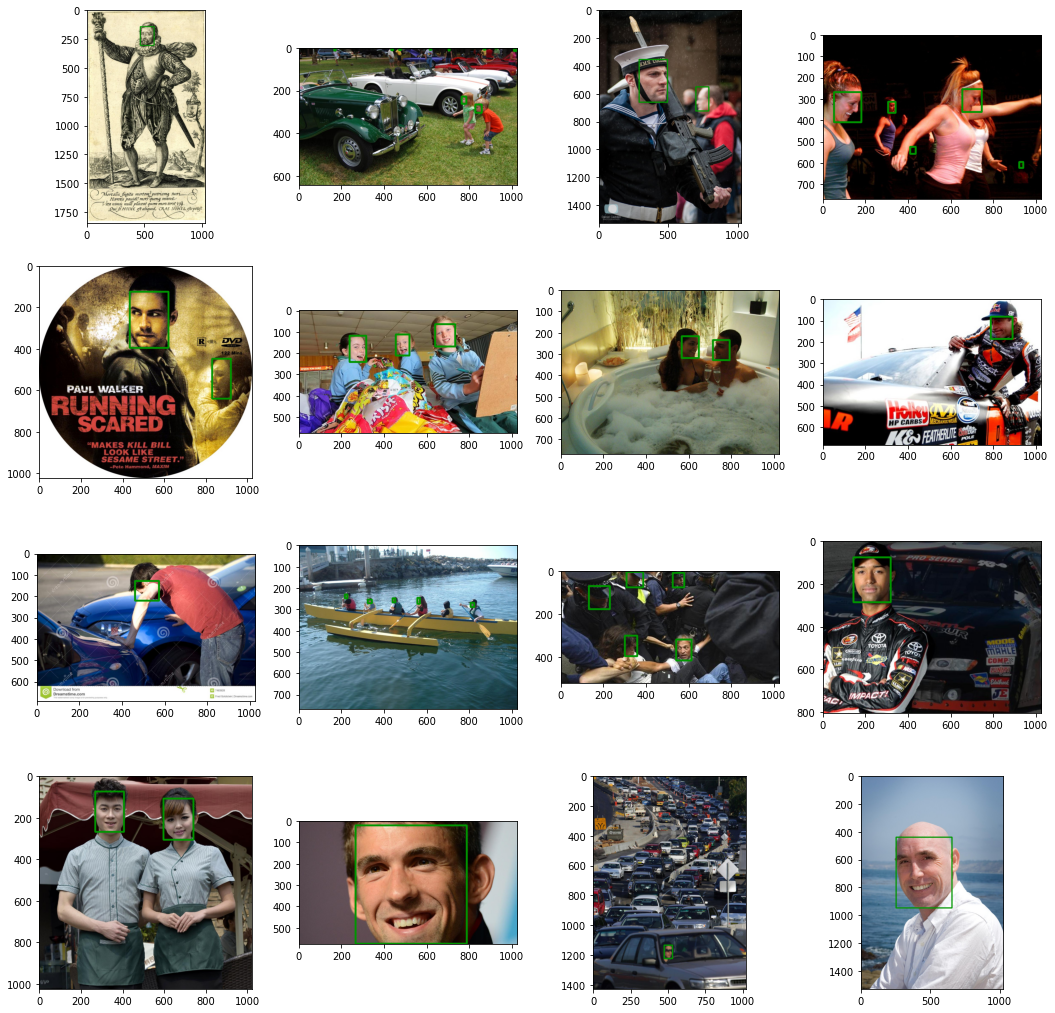

In [71]:
fig, axs = plt.subplots(4, 4, figsize=(18, 18))
n=0
for i in nombres:
    for j in range(4):
        bb, _,_ = train_set.extract_boxes(img_an+i[j][:-4]+".xml")
        box=dibujar_caja(cargar_imagen(img_dirs,i[j]),bb[0],color=(0,150,0))
        for z in range(1,len(bb)):
            box=dibujar_caja(box,bb[z],color=(0,150,0))
        axs[n][j].imshow(box)
    n+=1

### Entrenamiento

In [23]:
class rostroconfig(Config):
    # Se define el nombre de la configuracion
    NAME = "rostro_cfg"
    # numero de clases (fondo + rostro)
    NUM_CLASSES = 2
    # number of training steps per epoch
    STEPS_PER_EPOCH = 480

In [24]:
config = rostroconfig()
config.display()
# Definimos el modelo
model = MaskRCNN(mode='training', model_dir=img_dir+'/Pesos', config=config)
# Cargamos los pesos (mscoco) exluyendo las capas de salidad
model.load_weights(img_dir+'pesos/mask_rcnn_coco.h5', by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",  "mrcnn_bbox", "mrcnn_mask"])
# Entrenamos los pesos de las capas de salida
model.train(train_set, test_set, learning_rate=config.LEARNING_RATE, epochs=5, layers='heads')


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTA

D:\Universidad Nacional\Programas\Anaconda\Anaconda\envs\p37env\lib\site-packages\tensorflow\python\ops\gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
D:\Universidad Nacional\Programas\Anaconda\Anaconda\envs\p37env\lib\site-packages\tensorflow\python\ops\gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
D:\Universidad Nacional\Programas\Anaconda\Anaconda\envs\p37env\lib\site-packages\tensorflow\python\ops\gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/5
480/480 [==============================] - 16519s 34s/step - loss: 1.6588 - rpn_class_loss: 0.0498 - rpn_bbox_loss: 0.4528 - mrcnn_class_loss: 0.1533 - mrcnn_bbox_loss: 0.4465 - mrcnn_mask_loss: 0.5563 - val_loss: 1.4660 - val_rpn_class_loss: 0.0412 - val_rpn_bbox_loss: 0.3710 - val_mrcnn_class_loss: 0.1483 - val_mrcnn_bbox_loss: 0.3687 - val_mrcnn_mask_loss: 0.5369
Epoch 2/5
480/480 [==============================] - 16621s 35s/step - loss: 1.2511 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.2957 - mrcnn_class_loss: 0.1354 - mrcnn_bbox_loss: 0.2896 - mrcnn_mask_loss: 0.4999 - val_loss: 1.3950 - val_rpn_class_loss: 0.0901 - val_rpn_bbox_loss: 0.3862 - val_mrcnn_class_loss: 0.1157 - val_mrcnn_bbox_loss: 0.3149 - val_mrcnn_mask_loss: 0.4881
Epoch 3/5
480/480 [==============================] - 17489s 36s/step - loss: 1.1126 - rpn_class_loss: 0.0269 - rpn_bbox_loss: 0.2496 - mrcnn_class_loss: 0.1188 - mrcnn_bbox_loss: 0.2379 - mrcnn_mask_loss: 0.4793 - val_loss: 1.3964 - val_rpn_c

### Funciones de perdida

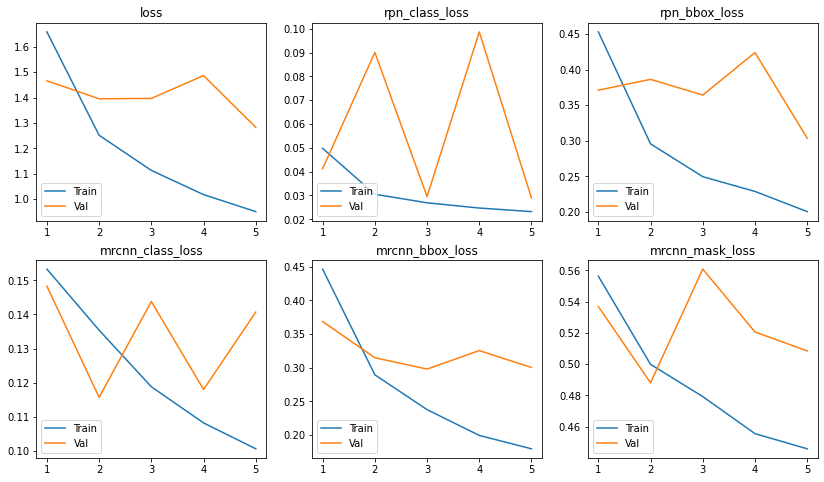

In [7]:
import matplotlib.pyplot as plt
loss_fun={"loss":[1.6588,1.2511,1.1126,1.0170,0.9500],
          "rpn_class_loss":[0.0498,0.0305,0.0269,0.0247,0.0232],
          "rpn_bbox_loss":[0.4528,0.2957,0.2496,0.2289, 0.2006],
          "mrcnn_class_loss":[0.1533,0.1354,0.1188,0.1082,0.1006],
          "mrcnn_bbox_loss":[0.4465,0.2896,0.2379,0.1996,0.1797],
          "mrcnn_mask_loss":[0.5563,0.4999,0.4793,0.4556,0.4459],
          "val_loss":[1.4660,1.3950,1.3964,1.4866,1.2824],
          "val_rpn_class_loss":[0.0412,0.0901,0.0295,0.0987,0.0289],
          "val_rpn_bbox_loss":[0.3710,0.3862,0.3642,0.4238,0.3037],
          "val_mrcnn_class_loss":[0.1483,0.1157,0.1438,0.1180,0.1407],
          "val_mrcnn_bbox_loss":[0.3687,0.3149,0.2981,0.3255,0.3005],
          "val_mrcnn_mask_loss":[0.5369,0.4881,0.5608,0.5206,0.5085]
         }

fig, axs = plt.subplots(2, 3,figsize=(14,8))
names=[i for i in loss_fun.keys()]
n=0
for i in range(6):
    if n<3:
        axs[0, n].plot(list(range(1,6)), loss_fun.get(names[i]),label="Train")
        axs[0, n].plot(list(range(1,6)), loss_fun.get(names[i+6]),label="Val")
        axs[0, n].set_title(names[i])
        axs[0, n].legend(loc ="lower left")
        n+=1
    else:
        axs[1, n-3].plot(list(range(1,6)), loss_fun.get(names[i]),label="Train")
        axs[1, n-3].plot(list(range(1,6)), loss_fun.get(names[i+6]),label="Val")
        axs[1, n-3].set_title(names[i])
        axs[1, n-3].legend(loc ="lower left")
        n+=1
        


In [85]:
m = tf.keras.metrics.MeanIoU(num_classes=2)
m.update_state([0, 0, 1, 1], [0, 1, 0, 1])
m

### Calculo de IoU para la evalución del modelo

La metrica para evaluar este modelo, llamada intersection over union (IoU), consiste en los siguente. Supongamos que a una imagen le dibujamos su cuadrado delimitador del rostro verdadero y el predicho por el modelo. Lo anterior se veria algo así

<center><img src=img/p4.png width="150" height="200"></center>

Donde el cuadro verde es el cuadro verdadero y el rojo el prdicho por el modelo. Ahora bien, ignorando un poco la imagen y centrandonos en los dos cuadros

<center><img src=img/p5.png width="150" height="200"></center>

el IoU consiste en ver la proporción del area del cuadro predicho por el modelo  que cayó sobre el cuadro verdadero. En otras palabras, se debe calcular el area de intersección ( area azul) y dividirla sobre el area del cuadro predicho por el modelo. Esto se hace para todas la imagenes de entrenamiento y se calcula el promedio. De igual manera se hace para el conjunto de imagenes de validación
    


In [2]:
from numpy import zeros
from numpy import asarray
from mrcnn.config import Config
from mrcnn.utils import compute_ap
from mrcnn.model import load_image_gt
from mrcnn.model import mold_image

class Prediccion(Config):
    NAME = "Rostro"
    NUM_CLASSES = 2
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
 
# Calcula el mAP del modelo sobre un conjunto de imagenes dado
def evaluacion(dataset, model, cfg):
    APs = list()
    for image_id in dataset.image_ids:
        # se carga la imagen, cuadro delimitador y la mascara para la imagen_id
        
        image, image_meta, gt_class_id, gt_bbox, gt_mask = load_image_gt(dataset, cfg, image_id, use_mini_mask=False)
        # convert pixel values (e.g. center)
        # convert image into one sample
        sample = np.expand_dims(mold_image(image, cfg), 0)
        # make prediction
        yhat = model.detect(sample, verbose=0)[0]
        # extract results for first sample
        # calculate statistics, including AP
        if yhat["masks"].size==0:
            continue
        AP, _, _, _ = compute_ap(gt_bbox, gt_class_id, gt_mask, yhat["rois"], yhat["class_ids"], yhat["scores"], yhat['masks'])
        # store
    # calculate the mean AP across all images
    mAP = np.mean(APs)
    return mAP
cfg = Prediccion()
# define the model
model2 = MaskRCNN(mode='inference', model_dir='D:/Proyecto_Mineria/Proyecto_JP/entrenamiento', config=cfg)
# load model weights
model2.load_weights('D:/Proyecto_Mineria/Proyecto_JP/Rostros/pesos/mask_rcnn_rostro_cfg_0005.h5', by_name=True)









Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [88]:
# load the train dataset
train_set = RostroDataset()
train_set.load_dataset(img_dir, entr)
train_set.prepare()
# load the test dataset
test_set = RostroDataset()
test_set.load_dataset(img_dir, val)
test_set.prepare()
# create config
print('Train: %d' % len(train_set.image_ids))
print('Test: %d' % len(test_set.image_ids))
# evaluate model on training dataset
train_mAP = evaluacion(train_set, model2, cfg)
print("Train mAP: %.3f" % train_mAP)
# evaluate model on test dataset
test_mAP = evaluacion(test_set, model2, cfg)
print("Test mAP: %.3f" % test_mAP)

Train:  440
Test:  120
Train mAP:  0.842
Test mAP:  0.725


### Predicción para algunas imagenes

In [5]:
df="C:/Users/Juan Pablo/Desktop/proyecto mineria/Rostros/imagenes_prueba"
#df=img_dir+"/imagenes_prueba"
image=[cargar_imagen(df,i) for i in listdir(df)]

scaled_image = [mold_image(i, cfg) for i in image]
# convert image into one sample
sample = [np.expand_dims(s, 0) for s in scaled_image]
# make prediction
yhat = [model2.detect(sample, verbose=0)[0] for sample in sample]

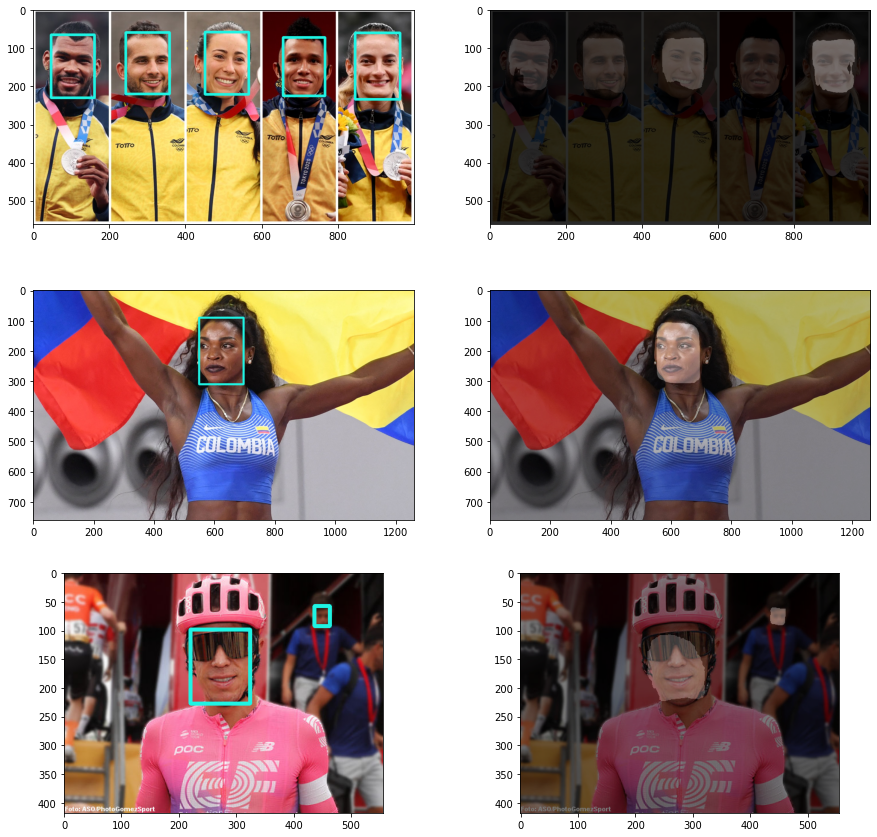

In [16]:
def dibujar_caja(imagen,caja,color,ancho_linea=5):
        cv2.rectangle(imagen, (caja[1],caja[0]),(caja[3],caja[2]),color,ancho_linea)
        return imagen
fig, axs = plt.subplots(len(listdir(df)), 2, figsize=(15, 15))
n=0
for i in listdir(df):
    box=dibujar_caja(cargar_imagen(df,i), yhat[n]['rois'][0,:] , color=(31, 244, 228))
    for z in range(1,yhat[n]['rois'].shape[0]):
        box=dibujar_caja(box,yhat[n]['rois'][z,:],color=(31, 244, 228))
    axs[n][0].imshow(box)
    axs[n][1].imshow(cargar_imagen(df,i))
    for w in range(yhat[n]["masks"].shape[2]):
        axs[n][1].imshow(yhat[n]["masks"][:,:,w],cmap='gray', alpha=0.3)
    n+=1


# - Conclusiones -
A manera de conclusiones, hemos logrado presentar un primer acercamiento al cómo realizar una tarea de reconocimiento facial aplicado a este conjunto de datos. Por supuesto, hay mucho margen de mejora, y más teniendo en cuenta que estamos estableciendo un inicio o un punto de partida para un estudio mucho más profundo en lo que a tratamiento de imágenes se refiere. Algunas de estas cosas que pueden mejorarse con un poco más de investigación y profundidad, pueden ser: 

- Se puede mejorar de la precisión considerando mas imágenes en el conjunto de entrenamiento, mayor número de épocas e incluso contemplar el entrenamiento del modelo en general.

- Existe bastante margen de mejora, teniendo en cuenta que se establece un punto de partida para un estudio mucho más profundo en lo que a tratamiento de imágenes se refiere.

- A partir de la implementación de la Mask R-CNN se puede extender fácilmente hacía la estimación de cualquier tipo de objeto. 

Y por último y no menos importante, se da la posibilidad al lector de aplicar y realizar un mejoramiento a los distintos algoritmos aquí planteados en esta o un conjunto de datos diferentes, esto con el fin de avanzar en la búsqueda de modelos que permitan realizar este u otros ajustes en un tratamiento de imágenes.



# - Referencias -
1. Diplomado en Inteligencia Artificial y Aprendizaje Profundo [repositorio Github](https://github.com/AprendizajeProfundo/Diplomado).
2. Detección y Reconocimiento Facial [(Notebook)](https://nbviewer.jupyter.org/github/AprendizajeProfundo/Diplomado/blob/master/Temas/Módulo%207-%20Aprendizaje%20Profundo%20I/2.%20Redes%20profundas/tl_deteccion_reconocimiento_facial.ipynb).
3. Operación Convolución [(Notebook)](https://nbviewer.jupyter.org/github/AprendizajeProfundo/Diplomado/blob/master/Temas/Módulo%207-%20Aprendizaje%20Profundo%20I/3.%20Tratamiendo%20de%20imágenes/Cuadernos/ti_convoluciones.ipynb).
4. [Aprendizaje Machine Learning](https://www.aprendemachinelearning.com/ejercicio-nlp-cuentos-de-hernan-casciari-python-espanol/).
5. [Deep into deep learning](https://d2l.ai).
6. [Máquinas de Vector Soporte (Support Vector Machines, SVMs)](https://www.cienciadedatos.net/documentos/34_maquinas_de_vector_soporte_support_vector_machines).
7. [Convolution Neural Network for Image Processing — Using Keras](https://towardsdatascience.com/convolution-neural-network-for-image-processing-using-keras-dc3429056306#:~:text=CNN%20or%20the%20convolutional%20neural,differentiate%20one%20from%20the%20other)
8. Base de datos [LFW](https://www.kaggle.com/atulanandjha/lfwpeople).
9. Consultas realizadas en Kaggle:
    - [Face Recognition on Olivetti Dataset](https://www.kaggle.com/serkanpeldek/face-recognition-on-olivetti-dataset/notebook).
    - [Face Recognition: Starter {Trick} Code with OUTPUT](https://www.kaggle.com/atulanandjha/face-recognition-starter-trick-code-with-output).
    - [Lfw_People Conv2D](https://www.kaggle.com/stpeteishii/lfw-people-conv2d).
    - [lfw_assignment](https://www.kaggle.com/bhargaviprasanna/ifw-assignment).
    - [Predict Famous People Gender](https://www.kaggle.com/theyoke/predict-famous-people-gender).
10. [Conceptos básicos de imágenes](https://iesandresbojollo.es/tiyc/gimp/basico/1-Conceptos_basicos.html).
11. [ANÁLISIS DE COMPONENTES PRINCIPALES (ACP)](https://www.xlstat.com/es/soluciones/funciones/analisis-de-componentes-principales-acp#:~:text=El%20Análisis%20de%20Componentes%20Principales,extracción%20de%20datos%20más%20populares.&text=Este%20método%20permite%20representar%20los,máximo%20la%20pérdida%20de%20información).